4 QPSK (Quadrature Phase Shift Keying)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

mapping_table = {
    (0,0) :  -1-1j,
    (0,1) :  -1+1j,
    (1,0) :   1-1j,
    (1,1) :   1+1j
}

def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])

def SP(bits):
    return bits.reshape((-1,2))

def QPSK_time(QAM_data, cc, cs):
    QPSK = list()
    for d in QAM_data:
        QPSK.append([c+1j*s for (c,s) in (cc,cs)] )
    
    return QPSK



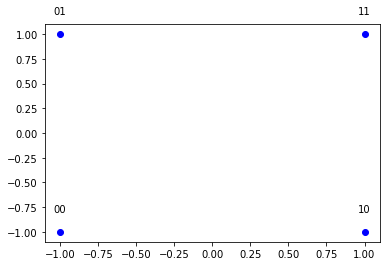

In [36]:

for b1 in [0, 1]:
    for b0 in [0, 1]:
        B = (b1, b0)
        Q = mapping_table[B]
        plt.plot(Q.real, Q.imag, 'bo')
        plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

In [37]:
# Parámetros de la señal
f_carrier = 10  # Frecuencia de la portadora en Hz
f_bit     = 5       # Frecuencia del bit en Hz
bit_rate  = 1 / f_bit  # Velocidad de transmisión en segundos por bit
amplitude_1 = 0.5   # Amplitud para bit 1
amplitude_0 = 0.1   # Amplitud para bit 0

# Muestreo del DAC
sample_rate = 1000  # Muestras por segundo 

# Mensaje a modular (en binario)
message = '10110001'



First 5 bit groups
[[1 0]
 [1 1]
 [0 0]
 [0 1]]
First 5 QAM symbols and bits:
[ 1.-1.j  1.+1.j -1.-1.j -1.+1.j]
(1-1j)
(1+1j)
(-1-1j)
(-1+1j)


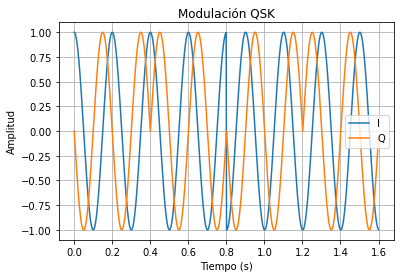

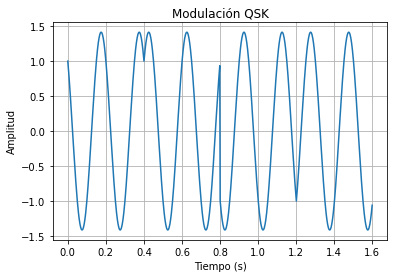

In [38]:
# Convertir el mensaje a una lista de bits
binary_data = np.array([int(bit) for bit in message])

bits_SP = SP(binary_data)
print ("First 5 bit groups")
print (bits_SP[:5,:])


QAM_data = Mapping(bits_SP)
print ("First 5 QAM symbols and bits:")
print (QAM_data[:5])



# Duración de cada bit
t_bit = np.arange(0, bit_rate, 1/sample_rate)

# Señal modulada QSK
modulated_signal_I = np.array([])
modulated_signal_Q = np.array([])
for vector in QAM_data:
    print(vector)
    modulated_signal_I = np.append(modulated_signal_I, vector.real * np.cos(2 * np.pi * f_carrier * t_bit))
    modulated_signal_Q = np.append(modulated_signal_Q, vector.imag * np.sin(2 * np.pi * f_carrier * t_bit))

# Tiempo total de la señal
total_time = len(binary_data) * bit_rate

# Eje de tiempo para la señal modulada
time = np.linspace(0, total_time, len(modulated_signal_I))

# Graficar las señales moduladas QSK
plt.plot(time, modulated_signal_I, label='I')
plt.plot(time, modulated_signal_Q, label='Q')
plt.title('Modulación QSK')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# Graficar las señales moduladas QSK
plt.plot(time, modulated_signal_Q + modulated_signal_I)
plt.title('Modulación QSK')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
